# SBU CSE 352 - HW 1 -  Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

---

All student names in group: [Liana Torpey, Blake Lewinksi]

I understand that my submission needs to be my own group's work: [LGT, BCL]

I understand that ChatGPT / Copilot / other AI tools are not allowed: [LGT, BCL]

## Instructions

Total Points: 100

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Only use standard packages (numpy, scipy, and built-in packages like random). Submit the completely rendered notebook as a HTML file.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [ ]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [ ]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'east'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`.

In [ ]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [ ]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: south
step 1 - action: suck
step 2 - action: suck
step 3 - action: north
step 4 - action: east
step 5 - action: east
step 6 - action: south
step 7 - action: east
step 8 - action: south
step 9 - action: north
step 10 - action: north
step 11 - action: east
step 12 - action: suck
step 13 - action: east
step 14 - action: east
step 15 - action: south
step 16 - action: west
step 17 - action: south
step 18 - action: suck
step 19 - action: suck


5

# Tasks

## General [10 Points]

1. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
2. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
3. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [ ]:
# importing the necessary libraries
import numpy as np # allows n-dimensional arrays: nxn room, n=5; monitors position
import random as rand # initialize the environment: p(dirty) = 0.2, random start

In [ ]:
# calibrate the robot bumpers
def calibrate_sensors(row, col, n, bumpers) :
  if row == 0 :
    bumpers["north"] = True
  else :
    bumpers["north"] = False

  if row == (n - 1):
    bumpers["south"] = True
  else :
    bumpers["south"] = False

  if col == 0 :
    bumpers["west"] = True
  else :
    bumpers["west"] = False

  if col == (n - 1):
    bumpers ["east"] = True
  else :
    bumpers ["east"] = False

In [ ]:
# n variable is attempt to make program dynamic for room size

def update_environment(row_index, col_index, environment) : # Function for debugging purposes
  if environment[row_index, col_index] == 1 : # square still needs to be cleaned but not
    # reached only with randomized agent
    return environment
  environment[row_index, col_index] = 2 # indicates that robot has reached square

  return environment

def simulation_environment(agent, n, character, max_steps) : # simple environment referencing a randomized agent

  if max_steps == 0 :
    energy_life = (2 * n * n)
  else :
    energy_life = max_steps
  # Worst case: every square in nxn room dirty; need >= nxn energy to clean every square
  # Double nxn value because need nxn movements to navigate to every square

  # Initialize the environment by storing the state of each square (clean/dirty) and making some dirty.
  # Environment represented as ndarray
  # 1 represents dirty, value used to set boolean value for dirty sensor
  # Known n value used to set boolean values for bumper sensors
  environment = np.random.choice([0, 1], size=(n,n), p=[0.8, 0.2]) # nxn

  #initialize room state
  sensors = {"north" : False, "east" : False, "south" : False, "west" : False} # sensors

  # initiate the robot @ starting location
  initial_square = np.random.choice(environment.size) # select random start position
  row_index, col_index = np.unravel_index(initial_square, environment.shape) # index position
  environment[row_index, col_index] = 2 # marks position of robot

  calibrate_sensors(row_index, col_index, n, sensors)

  energy_exerted = 0 # counts the number of actions it takes to clean room
  dirty = False

  # Offset position variables only used by Model-Reflex Agent
  row = 0
  col = 0

  for unit in range(energy_life) :
    # check dirty/clean sensor
    if environment[row_index, col_index] == 1 : # simulates and sets dirty sensor
      dirty = True

    # Call the agent function repeatedly and provide the agent function with the sensor inputs.
    if character == 's' : # call Simple Reflex Agent
      action = agent(sensors, dirty)
    elif character == 'm' : # call Model-Reflex Agent
      '''
      First call: row, col values arbitrary until Agent initializes itself
      Modle agent determines inital position (assume inital position is (0,0))
      "row" and "col" variable values represent offsets from initial position
      "row_index" and "col_index" values are NOT used by any agent to make a decision
      Index values are instead only used to print the updated environment, and calibrate the sensors
      '''
      action = agent(sensors, dirty, row, col, n)
    else : # default to Random Agent
      action = agent(sensors, dirty)

    energy_exerted = energy_exerted + 1 # Keep track of the performance measure.

    # React to the agent's actions
    # Keep track of the agent's position - referenced by Model Agent only
    # Random Agent - disregards position, Simple Agent - utilizes bumpers
    if action == "suck" :
        environment[row_index, col_index] = 3 # mark square clean
        dirty = False # reset clean/dirty sensor
    elif action == "north" :
      if row_index == 0 : # can't move up
        # Catching invalid case to prevent program crashing by random agent
        # Counts attempted action as energy_exerted
        continue
      else :
        row_index = row_index - 1
        row = row + 1
    elif action == "east" :
      if col_index == (n - 1) : # can't move right
        continue
      else :
        col_index = col_index + 1
        col = col + 1
    elif action == "west" :
      if col_index == 0 : # can't move left
        continue
      else :
        col_index = col_index - 1
        col = col - 1
    elif action == "south" :
      if row_index == (n - 1): # can't move down
        continue
      else :
        row = row - 1
        row_index = row_index + 1

    # recalibrate the robot sensors after movement to keep track of pattern
    calibrate_sensors(row_index, col_index, n, sensors)

    environment = update_environment(row_index, col_index, environment) # prints state of environment after movement

    if energy_exerted == energy_life :
      return energy_exerted

    if action == "finished" :
      return energy_exerted

  return energy_exerted

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [ ]:
def simple_reflex_agent(bumpers, dirty): # only get precepts as argument
  if dirty : # if the current square is dirty
    return "suck"

  # determine movements based on sensors
  # in the environment - the sensors are recalibrated after every call to agent

  movements = ["north", "east", "south", "west"]
  if (bumpers["north"] == False
      and bumpers["east"] == False
      and bumpers["south"] == False
      and bumpers["west"] == False) : # if in the middle of the room
    return np.random.choice(movements) # moves in whatever direction

  if bumpers["north"] == True and bumpers["east"] == True : # northeast corner
    # move anywhere but north or east
    choices = ["south", "west"]
    return np.random.choice(choices)

  if bumpers["south"] == True and bumpers["east"] == True : # southeast corner
    # move anywhere but south or east
    choices = ["north", "west"]
    return np.random.choice(choices)

  if bumpers["south"] == True and bumpers["west"] == True :# southwest corner
    # move anywhere but south or west
    choices = ["north", "east"]
    return np.random.choice(choices)

  if bumpers["north"] == True and bumpers["west"] == True : # northwest corner
    # move anywhere but north or west
    choices = ["south", "east"]
    return np.random.choice(choices)

  if bumpers["north"] == True : # move anywhere but north
    choices = ["south", "east", "west"]
    return np.random.choice(choices)

  if bumpers["east"] == True : # move anywhere but east
    choices = ["south", "north", "west"]
    return np.random.choice(choices)

  if bumpers["south"] == True : # move anywhere but south
    choices = ["north", "east", "west"]
    return np.random.choice(choices)

  if bumpers["west"] == True : # move anywhere but west
    choices = ["south", "east", "north"]
    return np.random.choice(choices)

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

DESCRIPTION OF AGENT STATE AND IMPLEMENTATION DESIGN:

---
**Agent State**: (what is described by the last received agent state event) The agent state recieved by the model-based reflex agent is its previous actions performed, its built in sensors (bumpers and if dirty), and its location offset based on it's original position asssumed to be (0,0). From this state information, the agent knows what to do so not to run into the walls, react to the dirty sensor correctly, what actions it performed previously, and the consequence of its change in position if the previous action is preserved.
<br>

**Agent Implementation**: The rules below are to implement a counterclockwise spiral to reach all the squares of the room. In high level, the robot first attempts to only use sensor bumper wall data and trace the boundary of the room; once the boundary is traced, the robot then relies on the previous action and if the next square, if the previous action is preserved, is already visited - the robot tries to preserve the previous action as far as possible.
<br>
MODEL AGENT KNOWLEDGE: The agent maintains two dictionaries. "representation"{} stores the coordinates of where the model agent has already visited. It is the model of the room that the agent maintains and can access to determine if it has already visited a square. "stored_information"{} stores string values of "boundary_traced" - if the robot has traced the boundary, because this determines if the returned actions are based on the sensors, or on the previous actions and where the robot has already been, "prev_action" stores what action the model just performed, "before_suck" stores the movement action the model performed before performing the suck action.
<br>
MAINTAINING MODEL REPRESENTATION OF WORLD STATE: The agent records its original position as (0,0)->(row, col) and all subsequent movements are based on offset values from where it originally started. These coordinate strings are stored in a representation{} dictionary to keep track if all the squares of the room are reached. A movement north - increments the row(x) value, south - decrements row(x) value, east - increments col(y) value, west - decrements col(y) value. This value is stored in the representation after the first occurrence of a south sensor bumper wall activation - in other words, if by default the agent is moving south to hit the south wall, these squares are not detected as reached (but they are still cleaned if dirty).
<br>
TRACING THE BOUNDARY: <BR>
The model agent first attempts to trace the outer room boundary based on the wall bumper sensors. If the agent is against the north wall, it goes west; against the west wall, it goes south; against the south wall, it goes east; against the east wall, it goes north. However, if the agent randomly generates not against a wall, by default it moves south until it hits the south wall, where it then follows the rules listed above based on the wall bumper sensors.
<br>
The agent will trace the outer room boundary relying solely on the wall bumper sensors. The agent checks each time if the room boundary is traced by using its knowledge of its current location, relative to its original starting position, and where it will be next if the action returned by the wall sensor is returned again. Hence, if the robot is at (-1, 1)->(down one from origin, to the right one of origin) and the south sensor is activated, then it knows the action returned will be east (based on the above rules). Therefore, it knows that it's next position will be (-1,2); the agent then checks if this potentially new coordinate is in its representation already, and if it is, then it markes that the boundary has been traced and it executes to implement the spiral pattern.
<br>
SPIRAL PATTERN <BR>
After the agent has traces its wall boundary using the sensors, it moves inwards to perform a counter clockwise spiral where it determines its next position based on its previous action performed and its knowledge of where it has already visited. The agent attempts to preserve and perform the previous action as long as possible, until it hits the event where if the previous action is performed for another iteration, then the next square will be a repeat. To move in: if the previous action east -> moves north and previous action is east, if previous action south -> moves east and previous action is south, if previous action north -> moves west and previous action is north, if previoius action west -> moves south and previous action is west. If the robot cannot move in the direction of the previous action because it would cause a repeat square of the room to be visited, then it follows the same rules as it did to trace the boundary: if previous is north -> move west, previous east -> move north, previous west -> move south, previous south -> move east.
<br>
The robot returns "finished" when all movements in every direction would cause an overlapp of the squares in the room.

In [ ]:
# global variable for Model Reflex Agent
representation = {} # model maintained by agent
'''
                   {key : value}
  representation = {"(row, col)" : visited boolean}
    The row and col values are the offset from the original random position
    The original random position is (0,0)
'''
stored_information = {} # acts as memory of agent
'''
                       {key : value}
  stored_information = {"variable name" : value }
                      ["boundary_traced" : complete boolean]
                      ["decrement_value" : 0]
                      ["prev_action" : "____"]
                      ["before_suck" : "____"]


  n/e/s/w_bound -> mark True @ first sensor date True, if in corner cases:
    (based on movements from corners)
    NE -> north True, leave east
    NW -> west True, leave north
    SW -> south True, leave west
    SE -> east True, leave south

  boundary_traced -> mark True when all bounds hit, increment stored decrement value

  decrement -> initialized at 0, increments every time a boundary traversal is closed

  start -> counts for the decrement_value how many boundaries traced
'''

def set_up_memory() : # Stored Information
  stored_information["boundary_traced"] = False
  stored_information["prev_action"] = ""
  stored_information["before_suck"] = "south"

def update_memory() :
  return

def update_representation(row, col) :
  key_string = "(" + str(row) + "," + str(col) + ")"
  representation[key_string] = True

'''
  Rules if actual boundary not yet traversed: based on sensor data
  (move down first if not at wall, else reference below)
  FOLLOW PREVIOUS ACTION UNTIL A NEW WALL NOT YET REACHED HIT
    1) "east" : True -> move up
    2) "north" : True -> move left
    3) "west" : True -> move down
    4) "south" : True -> move right

    if multiple sensors True (in one of four corners), base on cases:
      NE -> move left
      NW -> move down
      SW -> move right
      SE -> move up
'''

'''
  Rules if actual wall boundary traced: based on stored information
  EXECUTE BASED ON CONDITIONALS
  remember: row and col values are offset values respective to initial position
  if row < decrement_value
    move up
  if col <= decrement_value
    move right
  row >= n - 1 - decrement_value
    move down
  col > n - 1 - decrement_value
    move left

  agent knows finished cleaning entire room, when representation booleans all True
'''

def model_based_reflex_agent(sensors, dirty, row, col, n) :
  if (row == 0 and col == 0) and stored_information == {} : # makes sure global variables are cleared at start
    representation.clear()
    stored_information.clear()

  if stored_information == {} :
    set_up_memory()

  # Determines next locaiton is previous action preserved
  row_temp = row
  col_temp = col
  if stored_information["prev_action"] == "north" :
    row_temp = row_temp + 1 # move up from original
  if stored_information["prev_action"] == "east" :
    col_temp = col_temp + 1 # move right from original
  if stored_information["prev_action"] == "south" :
    row_temp = row_temp - 1 # move down from original
  if stored_information["prev_action"] == "west" :
    col_temp = col_temp - 1 # move left from original
  cord_string = "(" + str(row) + "," + str(col) + ")"
  check_string = "(" + str(row_temp) + "," + str(col_temp) + ")"

  # Cleans current square
  if dirty :
    stored_information["before_suck"] = stored_information["prev_action"]
    stored_information["prev_action"] = "suck"
    return "suck"

  north_string = "(" + str(row+1) + "," + str(col) + ")"
  east_string = "(" + str(row) + "," + str(col+1) + ")"
  south_string = "(" + str(row-1) + "," + str(col) + ")"
  west_string = "(" + str(row) + "," + str(col-1) + ")"
  # Checks if room is technically clean
  if (north_string in representation
      and east_string in representation
      and south_string in representation
      and west_string in representation
      ) :
    return "finished"

  # If next location already visited from previous action, and boundary not traced
  # Then move inward for spiral; executed the next iteration after suck is performed.
  if (check_string in representation
      and not stored_information["prev_action"] == "suck"
      and stored_information["boundary_traced"] == False
      ) : # visited current square
    stored_information["boundary_traced"] = True

    # based on sensor activate = note which sensor would return that previous actions
    # then base new action based on if in four coners and to preserve counter clockwise spiral
    if stored_information["prev_action"] == "north" :
      stored_information["prev_action"] = "north"
      return "west"

    if stored_information["prev_action"] == "east" :
      stored_information["prev_action"] = "east"
      return "north"

    if stored_information["prev_action"] == "south" :
      stored_information["prev_action"] = "south"
      return "east"

    if stored_information["prev_action"] == "west" :
      stored_information["prev_action"] = "west"
      return "south"
    # after boundary traced, relies on representation of previous states
  else :
    if stored_information["prev_action"] == "suck" :
      stored_information["prev_action"] = stored_information["before_suck"]
    update_representation(row, col) # update tracking of visitation

  if not stored_information["boundary_traced"] : # Movement based on sensors
    # Tracing the boundary of the room - using wall bumpers
    # south sensor activated
    if sensors["south"] and not sensors["east"] : # move down
      stored_information["prev_action"] = "east"
      return "east"
    if sensors["south"] and sensors["east"] : # southeast corner
      stored_information["prev_action"] = "north"
      return "north"

    # east sensor activated
    if sensors["east"] and not sensors["north"] : # move right
      stored_information["prev_action"] = "north"
      return "north"
    if sensors["east"] and sensors["north"] : # northeast corner
      stored_information["prev_action"] = "west"
      return "west"

    # west sensor activated
    if sensors["west"] and not sensors["south"] : # move left
      stored_information["prev_action"] = "south"
      return "south"
    if sensors["west"] and sensors["south"] : # southwest corner
      stored_information["prev_action"] = "east"
      return "east"

    # north sensor activated
    if sensors["north"] and not sensors["west"] : # move up
      stored_information["prev_action"] = "west"
      return "west"
    if sensors["north"] and sensors["west"] : # northwest corner
      stored_information["prev_action"] = "south"
      return "south"

    if (not sensors["north"]
        and not sensors["east"]
        and not sensors["south"]
        and not sensors["west"]) : # move down until hit south wall
        if not sensors["south"] : # don't store inner squares (simplifies spiral)
          del representation[cord_string] # delete the movement from model for spiral pattern
        return "south" # move south by default

  else : # Movement based on prior knowledge - preserve last action until overlapp
    if stored_information["prev_action"] == "suck" :
      stored_information["prev_action"] = stored_information["before_suck"]

    if check_string in representation : # uses "check string" calculated based on previous actions
      '''
        agent relies on previous action to determine next action
        if previous action cannot be continued because next square in that direction already visited
        Next action will be to preserve the counterclockwise spiral pattern
      '''
      if stored_information["prev_action"] == "north" :
        stored_information["prev_action"] = "west"
        return "west"
      if stored_information["prev_action"] == "east" :
        stored_information["prev_action"] = "north"
        return "north"
      if stored_information["prev_action"] == "south" :
        stored_information["prev_action"] = "east"
        return "east"
      if stored_information["prev_action"] == "west" :
        stored_information["prev_action"] = "south"
        return "south"
    else : # preserve last action
      return stored_information["prev_action"]

In [ ]:
# simulation_environment(agent = model_based_reflex_agent, n=5, character='m', max_steps=0)
# simulation_environment(agent = simple_reflex_agent, n=5, character='', max_steps=0)
# simulation_environment(agent = simple_randomized_agent, n=5, character='r', max_steps=0)

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each with 100000 max steps. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

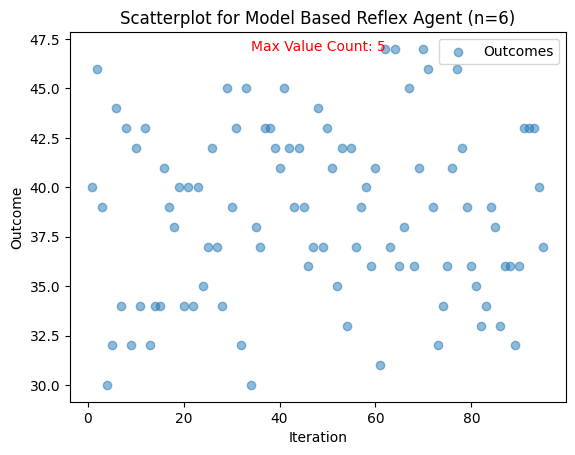

Table summarizing data:
Rows = nxn size, Columns = Individual Agents
n = 6
Agent         |   Outcome
--------------------------
simple_randomized_agent|   100000.0
simple_reflex_agent|   100000.0
model_based_reflex_agent|   38.65263157894737




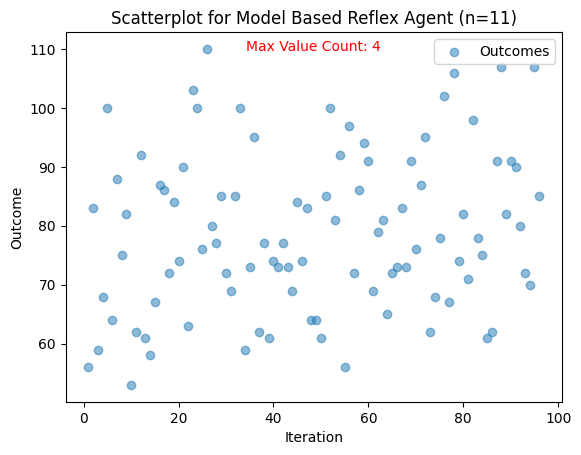

Table summarizing data:
Rows = nxn size, Columns = Individual Agents
n = 11
Agent         |   Outcome
--------------------------
simple_randomized_agent|   100000.0
simple_reflex_agent|   100000.0
model_based_reflex_agent|   78.76041666666667




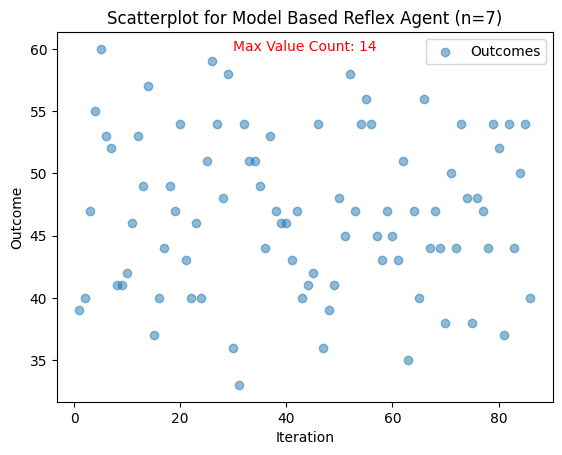

Table summarizing data:
Rows = nxn size, Columns = Individual Agents
n = 7
Agent         |   Outcome
--------------------------
simple_randomized_agent|   100000.0
simple_reflex_agent|   100000.0
model_based_reflex_agent|   46.77906976744186




In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

def simulation():
  n_values = random.sample(range(5, 16), 3)
  initial_iterations = 100
  functions = ['simple_randomized_agent', 'simple_reflex_agent', 'model_based_reflex_agent']
  data = {n: {func: [] for func in functions} for n in n_values}

  for n in n_values:
      for i in range(initial_iterations):
          representation.clear()
          stored_information.clear()
          data[n]['simple_randomized_agent'].append(simulation_environment(agent=simple_randomized_agent, n=n, character='r', max_steps=100000))
          data[n]['simple_reflex_agent'].append(simulation_environment(agent=simple_reflex_agent, n=n, character='', max_steps=100000))
          data[n]['model_based_reflex_agent'].append(simulation_environment(agent=model_based_reflex_agent, n=n, character='m', max_steps=100000))

  # Scatterplot for model-based reflex agent data
  for n in n_values:
      plt.figure()
      plt.title(f"Scatterplot for Model Based Reflex Agent (n={n})")
      plt.xlabel("Iteration")
      plt.ylabel("Outcome")
      outcomes = data[n]['model_based_reflex_agent']
      max_value_count = outcomes.count(100000)  # Count occurrences of the maximum value
      filtered_outcomes = [outcome for outcome in outcomes if outcome != 100000]  # Filter out the maximum value

      plt.scatter(range(1, len(filtered_outcomes) + 1), filtered_outcomes, alpha=0.5, label='Outcomes')

      # Annotate the scatter plot with the count of the maximum value
      plt.annotate(f'Max Value Count: {max_value_count}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', fontsize=10, color='red')

      plt.legend()
      plt.show()

      # Table to summarize the data
      print("Table summarizing data:")
      print("Rows = nxn size, Columns = Individual Agents")
      print(f"n = {n}")
      print("Agent         |   Outcome")
      print("--------------------------")
      for func in functions:
        outcomes = data[n][func]
        if func == 'model_based_reflex_agent':
            outcomes = [outcome for outcome in outcomes if outcome != 100000]  # Exclude the value 100000
        mean_outcome = np.mean(outcomes)
        print(f"{func.ljust(15)}|   {mean_outcome}")
      print("\n")

simulation()

Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

The general trends discussed below based on the above graphical analysis representations: the model based reflex agent returns PEAS measure clustered around nxn and the simple reflex agent and the random reflex agent always returns the max PEAS measure.
<br>
I randomly selected an n value from 5 and 15 (since 16 is exclusive), and then for every n value I executed 100 iterations. For every iteration, for each reflex agent, the PEAS returned measure is stored in a data list. For all three agents, for each value of n, I generated a table where it returned the average PEAS measure by each of the agents. For the model based reflex agent I excluded the cases where the PEAS measure was equal to the max because I considered this an error case where the algorithm failes. In addition, for the model based agents only, I generated a scatter plot to show the distribution clustering where the PEAS measure returned clusters around nxn value. in each of the scatterplots, I exclude the cases where the max value of 100000 was returned, because I wanted to show the general pattern of the algorithm.  
<br>
The PEAS measure for the random reflex agent and for the simple reflex agent will always be the max at 100000. The random reflex agent returns a random action, and therefore may bump repeatedly into walls, and not clean squares that need to be cleaned/clean squares that need not be cleaned; per randomness, it does not execute based on any information. The simple reflex agent, doesn't bump into walls and cleans the correct squares based on the sensors; per its simplexity, it only executes based on the current precept values and does not store any state information. As a consequence, all iterations for every n value of these agent simulations, will always return the max number of steps - representing that the robot ran out of energy - because they have no way of knowing if they are done executing on cleaning the room. There is not logical reason to execute the simulations, because reasonably one can assert that the max value is the only value returned, since there is no stopping case. The simulation is essentially a recursive solution, but for the simple agent and the random agent the problem does not divide into smaller subproblems, because no information is stored.
<br>
This is supported by the 3 sets of graphical representations above, where the random reflex agent and the simple reflex agent only have a returned PEAS value at the max. Both agents have no way of determining whether the entire room has been cleaned, and therefore cannot terminate before the robot runs out of energy.
<br>
The model based reflex agent, stores state information, and maintains a representation of the room. As a result the PEAS measure limits to approximately n*n, whereas it points to the robot moving across every square of the room to make sure it is cleaning the entire room, and the extra action costs are from cleaning the dirty squares.
<br>
In conclusion, even though the model based reflex agent occassionally fails (as pointed to by the ocassional max return PEAS value), for the majority of the time is returns a PEAS value close to n*n - which makes sense because it shows that the robot has moved to every sqaure, and the extra indicates the robot cleaning the dirty squars. The scatterplot shows the distribution clustering around this n*n value showing that the model-based agent works best to optimize the movements through the room to reach every square but still clean the correct squares.

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

RECTANGULAR ROOM UNKNOWN SIZE: Choose the model-based agent <BR>
*Random Reflex Agent*: The agent will still return a PEAS measure of the max number of steps (per discussed above in the graphical analysis). It will still execute the same as when the size is known. The agent does not use any percept information, it randomly chooses its action in a nondeterministic way. <BR>
*Simple Reflex Agent*: The agent will still return a PEAS measure of the max number of steps (per discussed above in the graphical analysis). It will still execute the same as when the size is known. The agent uses its sensors to not bump into walls and reacts to the dirty sensor and cleans a dirty square. So in a room of unknown size, it will still move around and not bump into the walls and react to the dirty square sensor correctly. <BR>
*Model Reflex Agent*: The agent algorithm will still behave correctly, becasue the implementation does not assume anything about size and does not use the known n value to dictate its movements. The agent would simply move down until it hits the south bumper, and then it would move in a counter clockwise spiral pattern moving inwards after tracing it's outer wall boundaries. The agent maintains a representation of the squares in the room it has visited, and uses bumper sensors and previous action information and its known location offset from the original position to move around the entire room. <BR>

CLEANING AREA IRREGULAR SHAPE: Choose the simple reflex agent <BR>
*Random Reflex Agent*: This is the worst agent for this situation, it moves around randomly in a nondeterministic way where it does not react to any of the sensors correctly and has a higher chance than the other agents of returning an illegal movement action. <BR>
*Simple Reflex Agent*: In this case, the simple reflex agent would work the best, because it would not get stuck in any weird configurations of the irregular shape. The agent would not hit any walls because it does not use any algorithm logic, it instead moves around so it doesn't perform an illegal movement action and it always reacts to the dirty sensor correctly. So even though it always returns the max PEAS value, or the max number of steps = max energy units, it has the better chance in all average cases, to clean most of the room and not get stuck. <BR>
*Model Reflex Agent*: In the best case, the agent algorithm would make the irregular shape a rectangle and ignore the surrounding boundary that makes the room not a rectangle. In the worst case, it may also get stuck in a corner, where it doesn't think the boundary is traced, but every movement it attempts based on its sensors will return an invalid action; however, this attempted action would still use up an energy unit. In this case there is a higher probability chance that the agent will return the max PEAS measure because the agent will try and execute its rules that work for its implementation in a rectangular room, but this will not work if the irregular shape leads to the agent getting stuck. <BR>

CONTAINS OBSTACLES: choose the simple reflex agent <BR>
*Random Reflex Agent*: This is still the worst agent, it moves around randomly, and now with introduced obstacles there is a higher chance that the returned action movement is illegal. <BR>
*Simple Reflex Agent*: This performs the best, because it would avoid all the obstacles and still react correctly to the dirty squares. <BR>
*Model Reflex Agent*: Once again, when the model does not correspond to the original model that the model reflex agent was based on, the agent does not know how to adjust its algorithm rules. <BR>

The above discussion on the performance of each agent in a novel situation, proves the important of the agent state and the model representation of the world for the model-based agent. The model based agent peformed the best when the room was most similar to the original world it was programmed for - a rectangular room of unknown size. However, when placed in a different world situation, the agent was not able to dynamically adjust its algorithm rules to avoid getting stuck in a position where it does not know what to do based on its previous knowledge of the percepts and the model representation.



---
Assignment adapted from [Michael Hahsler](https://github.com/mhahsler/CS7320-AI) under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/deed.en) license.
